# Classify CIFAR 10 images with a CNN model but study the effect on the performance by varying the following modeling aspects:

1) Batch Normalization

2) Dropout

3) Number of convolution and pooling layers

4) Activation function



---



*Note: CIFAR-10 is a dataset commonly used for image classification tasks, and it consists of 60,000 32x32 color images in 10 different classes, with each class representing a specific object category (Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck)*




# STEP 1: Train and Preprocess data

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Image Normalization
train_images, test_images = train_images / 255.0, test_images / 255.0



170498071/170498071 [==============================] - 4s 0us/step


# .

---



In [ ]:
import numpy as np
#Function to display one image per class
def plot_one_image_per_class(images, labels):
    num_classes = len(np.unique(labels))
    plt.figure(figsize=(15, 10))

    #Keep track of whether an image for each class has been displayed
    displayed_classes = set()

    for i in range(len(labels)):
        class_label = labels[i][0]

        #Check if an image for this class has already been displayed
        if class_label not in displayed_classes:
            plt.subplot(1, num_classes, len(displayed_classes) + 1)
            plt.imshow(images[i])
            plt.title(f"Class: {class_label}")
            plt.axis('off')

            #Mark this class as displayed
            displayed_classes.add(class_label)

        #Stop once an image for each class has been displayed
        if len(displayed_classes) == num_classes:
            break

    plt.show()


# Display sample images

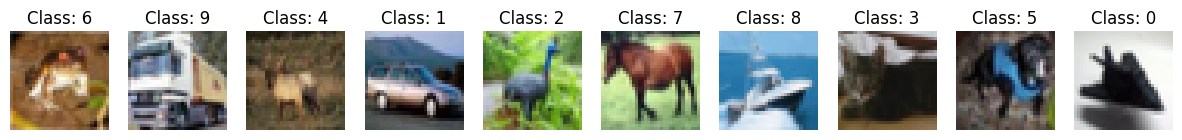

In [ ]:
#Display one image per class from the training dataset
plot_one_image_per_class(train_images, train_labels)


# STEP 2: Create a base CNN model

In [ ]:
#Base CNN model
base_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])


*Note: The base CNN model has a total of seven layers: two convolutional layers, two max-pooling layers, one flatten layer, and two dense layers.*

# STEP 3: Compile and train the base model with 100 epochs (~15 min)


In [ ]:
# Compile and train the base model with 100 epochs
base_model.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])
history = base_model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels))



Epoch 1/100
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9760 - accuracy: 0.6598 - val_loss: 0.9604 - val_accuracy: 0.6648
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8669 - accuracy: 0.6976 - val_loss: 0.9479 - val_accuracy: 0.6699
Epoch 3/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7798 - accuracy: 0.7270 - val_loss: 0.9013 - val_accuracy: 0.6892
Epoch 4/100
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6917 - accuracy: 0.7587 - val_loss: 0.9000 - val_accuracy: 0.6904
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6251 - accuracy: 0.7814 - val_loss: 0.9689 - val_accuracy: 0.6771
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5598 - accuracy: 0.8036 - val_loss: 0.9709 - val_accuracy: 0.6899
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4966 - accuracy: 0.8238 - val_loss: 0.9649 - val_ac

# Plot the Accuracy and Loss graphs

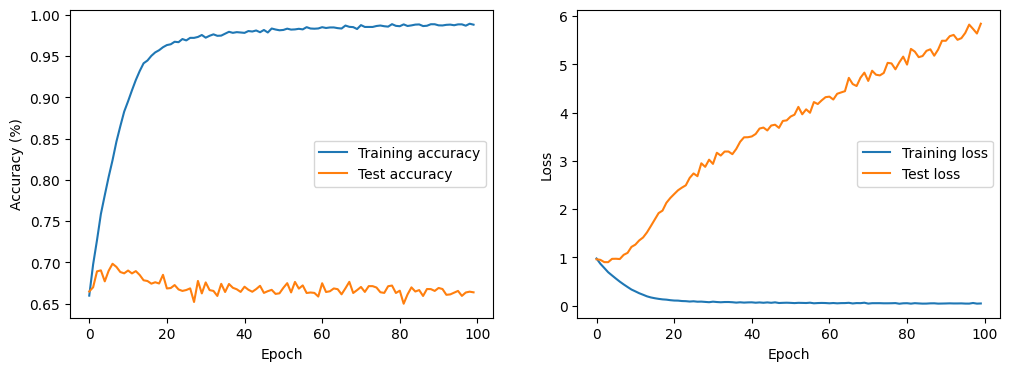

In [ ]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')  # Updated ylabel
plt.legend(loc='center right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='center right')
plt.show()

# Experiment 1: Batch Normalization

#Function to create and train the CNN model with a given batch size

*Note: Reduced 2 layers in the CNN and number of Epochs by 30 to reduce the total time of experiment. From previous experiment we can see the stability gained post epoch 30*

In [ ]:
# Function to create and train the CNN model with a given batch size
def train_cnn(batch_size):

    # Load and preprocess CIFAR-10 dataset
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
    train_images, test_images = train_images / 255.0, test_images / 255.0

     # Create the CNN model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10)
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=30,
                        validation_data=(test_images, test_labels), verbose=0)

    # Plot accuracy and loss curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='test accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'Batch Size: {batch_size}')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='test loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title(f'Batch Size: {batch_size}')

    plt.show()

    # Get the final accuracy and loss
    final_accuracy = history.history['accuracy'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]
    final_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    return final_accuracy, final_val_accuracy, final_loss, final_val_loss


#Perform experiments for different batch sizes (32,64,128,256)

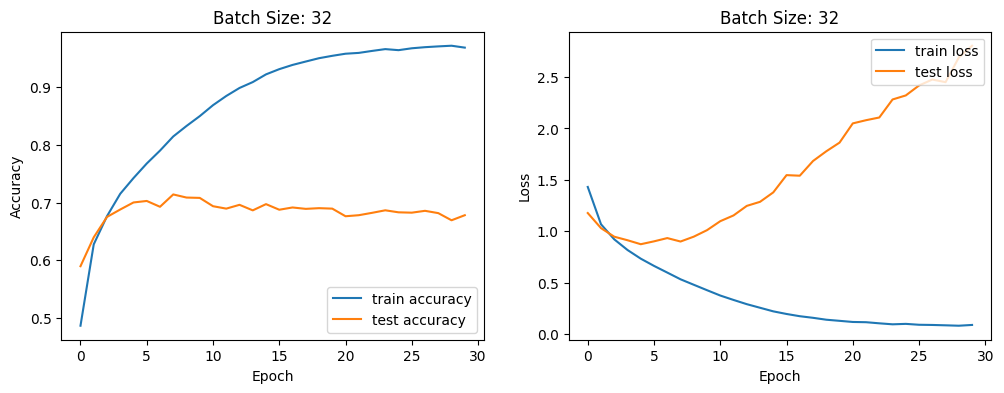

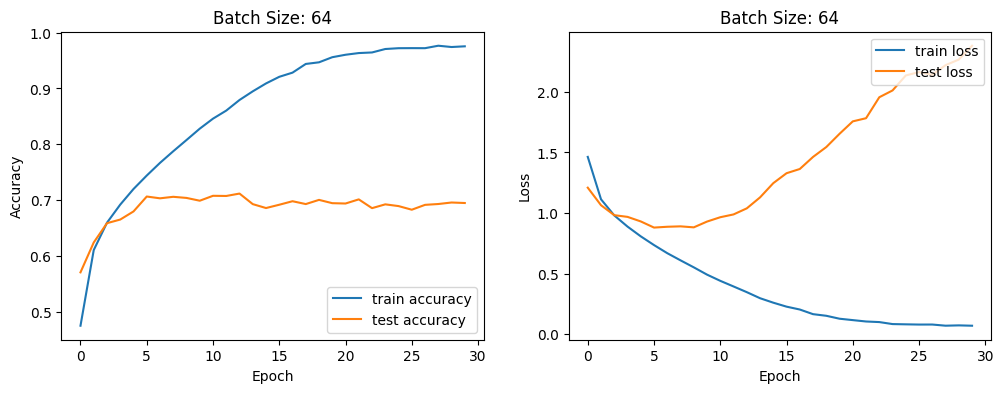

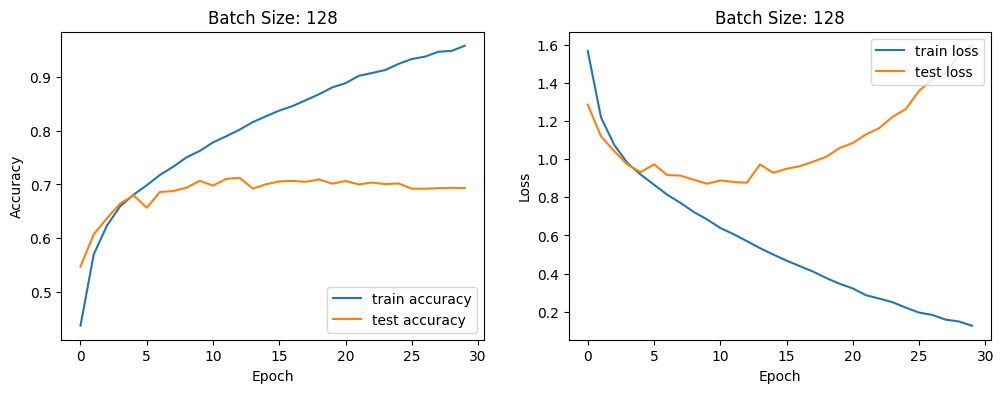

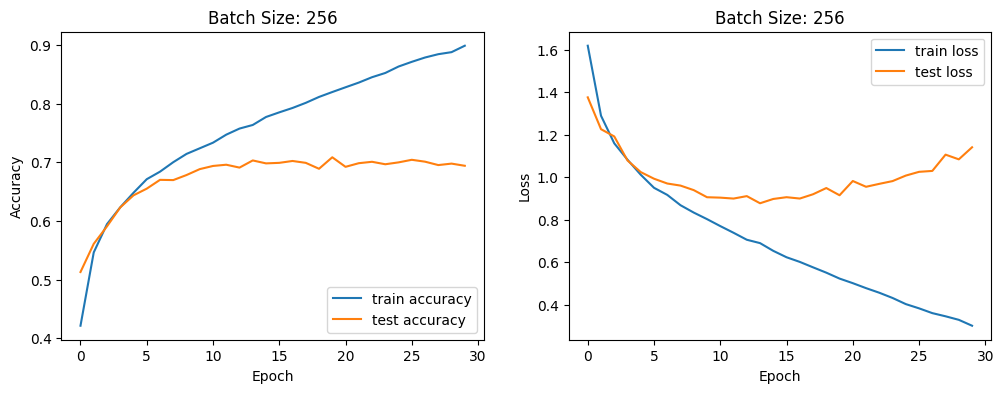

In [ ]:
# Batch sizes to experiment with
batch_sizes = [32, 64, 128, 256]

# Dictionary to store results
results = {}

# Perform experiments for different batch sizes
for batch_size in batch_sizes:
    final_accuracy, final_val_accuracy, final_loss, final_val_loss = train_cnn(batch_size)
    results[batch_size] = {
        'Final Accuracy': final_accuracy * 100,  # Convert to percentage
        'Final Validation Accuracy': final_val_accuracy * 100,  # Convert to percentage
        'Final Loss': final_loss,
        'Final Validation Loss': final_val_loss,
    }



#Display the final results

In [ ]:
for batch_size, metrics in results.items():
    print(f'Batch Size: {batch_size}')
    print(f'Training Accuracy: {metrics["Final Accuracy"]:.2f}%')
    print(f'Testing Accuracy: {metrics["Final Validation Accuracy"]:.2f}%')
    print(f'Training Loss: {metrics["Final Loss"]:.4f}')
    print(f'Testing Loss: {metrics["Final Validation Loss"]:.4f}')
    print()


Batch Size: 32
Training Accuracy: 96.86%
Testing Accuracy: 67.81%
Training Loss: 0.0887
Testing Loss: 2.8046

Batch Size: 64
Training Accuracy: 97.54%
Testing Accuracy: 69.50%
Training Loss: 0.0703
Testing Loss: 2.3812

Batch Size: 128
Training Accuracy: 95.86%
Testing Accuracy: 69.35%
Training Loss: 0.1266
Testing Loss: 1.5949

Batch Size: 256
Training Accuracy: 89.90%
Testing Accuracy: 69.42%
Training Loss: 0.3017
Testing Loss: 1.1407



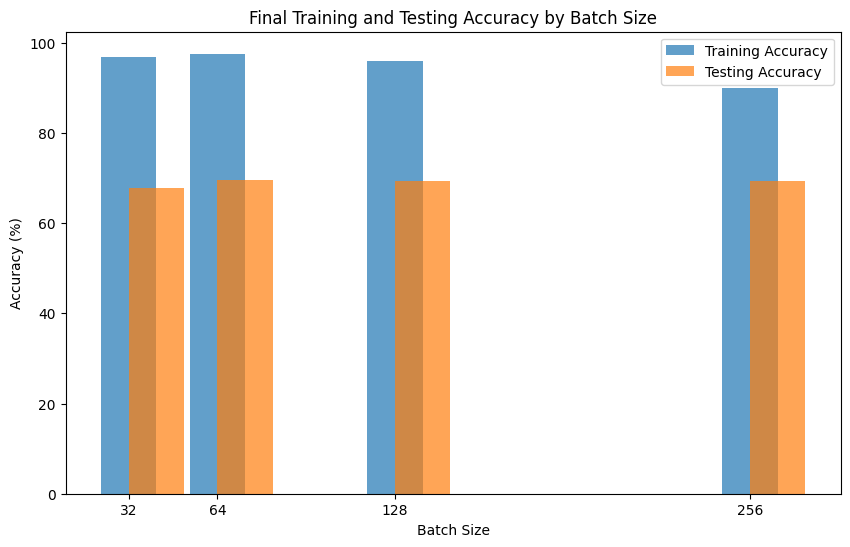

In [ ]:
import matplotlib.pyplot as plt

# Extract batch sizes and metrics
batch_sizes = list(results.keys())
training_accuracies = [metrics['Final Accuracy'] for metrics in results.values()]
testing_accuracies = [metrics['Final Validation Accuracy'] for metrics in results.values()]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(batch_sizes, training_accuracies, width=20, label='Training Accuracy', align='center', alpha=0.7)
plt.bar(batch_sizes, testing_accuracies, width=20, label='Testing Accuracy', align='edge', alpha=0.7)
plt.xlabel('Batch Size')
plt.ylabel('Accuracy (%)')
plt.title('Final Training and Testing Accuracy by Batch Size')
plt.xticks(batch_sizes)
plt.legend()
plt.show()


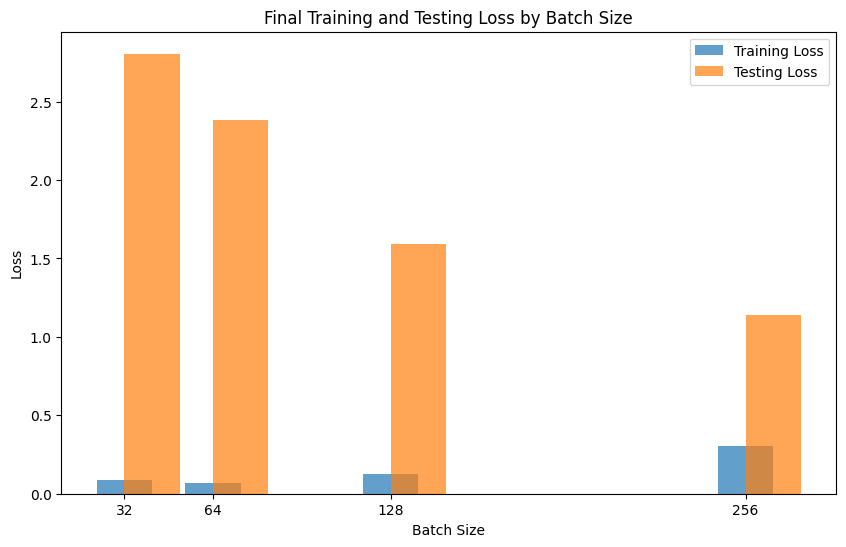

In [ ]:
import matplotlib.pyplot as plt

# Extract batch sizes and metrics
batch_sizes = list(results.keys())
training_losses = [metrics['Final Loss'] for metrics in results.values()]
testing_losses = [metrics['Final Validation Loss'] for metrics in results.values()]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(batch_sizes, training_losses, width=20, label='Training Loss', align='center', alpha=0.7)
plt.bar(batch_sizes, testing_losses, width=20, label='Testing Loss', align='edge', alpha=0.7)
plt.xlabel('Batch Size')
plt.ylabel('Loss')
plt.title('Final Training and Testing Loss by Batch Size')
plt.xticks(batch_sizes)
plt.legend()
plt.show()


# Extra testing

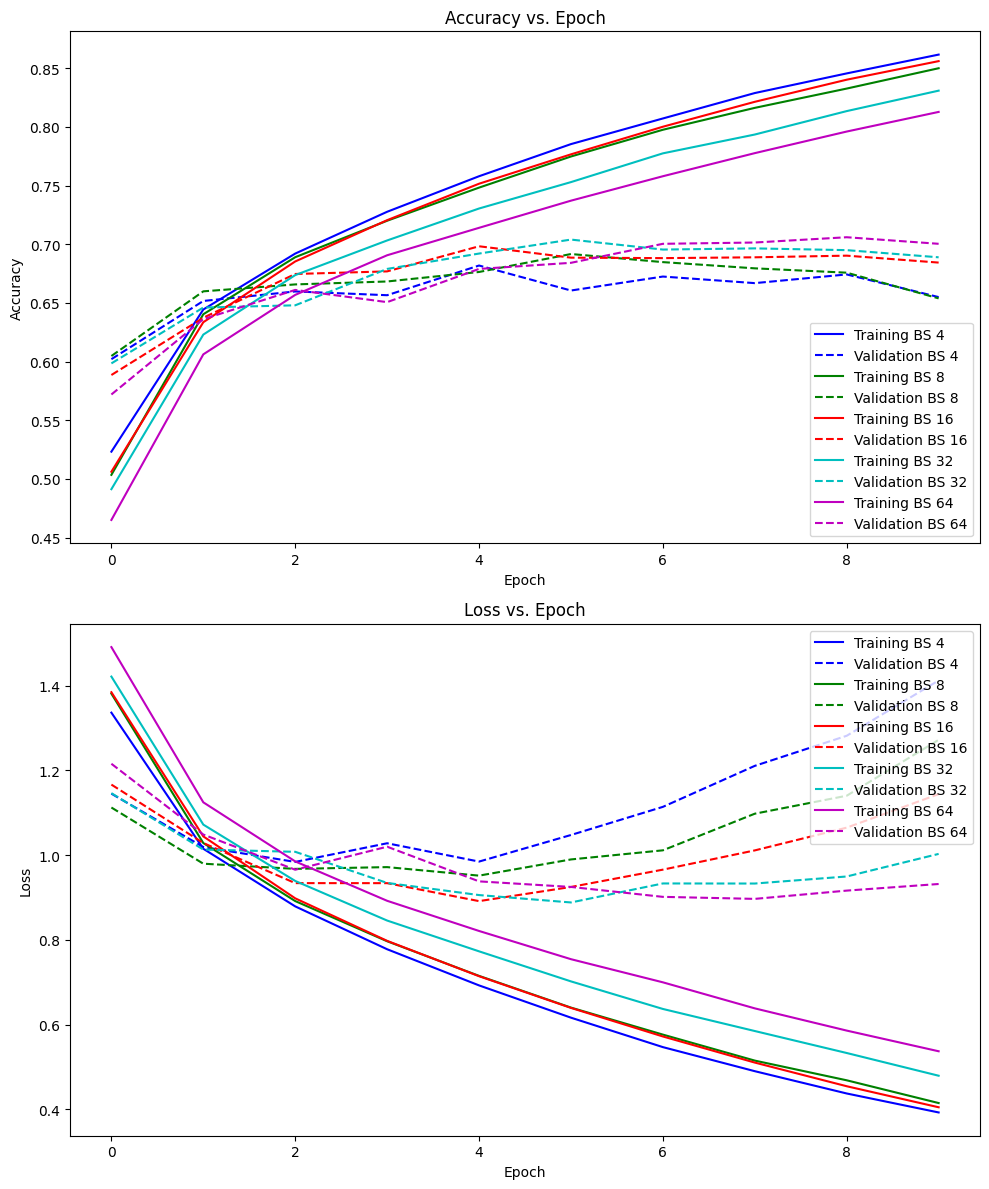

In [ ]:
import matplotlib.pyplot as plt

# Define a list of batch sizes and corresponding colors
batch_sizes = [4, 8, 16, 32, 64]
colors = ['b', 'g', 'r', 'c', 'm']

# Create subplots for accuracy and loss
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot accuracy curves for different batch sizes
for i, bs in enumerate(batch_sizes):
    # Get the training history for the current batch size
    hist = history[str(bs)]

    # Plot training accuracy curve with a different color for each batch size
    axes[0].plot(hist.history['accuracy'], label=f'Training BS {bs}', color=colors[i])

    # Plot validation accuracy curve with a different color and linestyle for each batch size
    axes[0].plot(hist.history['val_accuracy'], linestyle='--', label=f'Validation BS {bs}', color=colors[i])

# Set titles and labels for accuracy plot
axes[0].set_title('Accuracy vs. Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='lower right')

# Plot loss curves for different batch sizes
for i, bs in enumerate(batch_sizes):
    # Get the training history for the current batch size
    hist = history[str(bs)]

    # Plot training loss curve with a different color for each batch size
    axes[1].plot(hist.history['loss'], label=f'Training BS {bs}', color=colors[i])

    # Plot validation loss curve with a different color and linestyle for each batch size
    axes[1].plot(hist.history['val_loss'], linestyle='--', label=f'Validation BS {bs}', color=colors[i])

# Set titles and labels for loss plot
axes[1].set_title('Loss vs. Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper right')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()
